
<h2>Project: Predicting water availability</h1>

<h2>Table of content</h2>
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#Data gathering "> Data gathering </a></li>
<li><a href="#Programmatic Data assessment">Programmatic assessments</a></li>
<li><a href="#Data quality issues">Data quality issues</a></li>
<li><a href="#Data cleaning">Data cleaning</a></li>
<li><a href="#Data Understanding">Data Understanding</a></li>
<li><a href="#Modeling">Modeling</a></li>
<li><a href="#Communicating the results">Communicating the results</a></li>

# 1. Defining Problem

# Problem statement

In [1]:
#set a working directory on the google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/water_avail/

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/water_avail


In [3]:
#Load the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Import machine learning libraries
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:

#Load the dataset from the internet (orginal source)
file='https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-04/water.csv'
df=pd.read_csv(file, delimiter=',')
#save te data for the future use
df.to_csv('wateravailability.csv')
# extract data from Rwanda only and look at the data dimension
rw=df[df['country_name']=='Rwanda']
# let's save the Rwandan dataset for the future use. in this case we do not need to load data from the internet everytime we start the notebook
rw.to_csv('rwanda_water.csv', index=False)


In [ ]:
# load the rwanda data from the drive for our analysis
rw=pd.read_csv('rwanda_water.csv')
print(rw.shape)

(2953, 13)


In [ ]:
#print the first 10 rows to llok at the data header
rw.head(10)

,row_id,lat_deg,lon_deg,report_date,status_id,water_source,water_tech,facility_type,country_name,install_year,installer,pay,status
0,34217,-2.228252,30.231672,09/30/2019,y,Piped Water,Tapstand,Improved,Rwanda,2019.0,WaterAid,NaN,NaN
1,33761,-2.101375,30.189358,02/19/2020,y,Rainwater Harvesting,Hand Pump - Nira,Improved,Rwanda,2019.0,WaterAid,NaN,NaN
2,33466,-2.198694,30.199084,04/28/2020,y,Protected Spring,NaN,Improved,Rwanda,2019.0,WaterAid,NaN,NaN
3,33756,-2.205361,30.070403,02/20/2020,y,Rainwater Harvesting,Hand Pump - Nira,Improved,Rwanda,2020.0,WaterAid,NaN,NaN
4,33553,-2.432178,29.588362,03/31/2020,y,Piped Water,Tapstand,Improved,Rwanda,2020.0,WaterAid,NaN,NaN
5,33760,-2.274193,29.476524,02/19/2020,y,Rainwater Harvesting,NaN,Improved,Rwanda,2019.0,WaterAid,NaN,NaN
6,34222,-2.109683,30.067292,09/30/2019,y,Rainwater Harvesting,Hand Pump - Nira,Improved,Rwanda,2019.0,WaterAid,NaN,NaN
7,34221,-2.159523,30.231497,09/30/2019,y,Rainwater Harvesting,NaN,Improved,Rwanda,2019.0,WaterAid,NaN,NaN
8,34215,-2.476687,29.446412,09/30/2019,y,Rainwater Harvesting,NaN,Improved,Rwanda,2019.0,WaterAid,NaN,NaN
9,33759,-2.049870,30.158613,02/19/2020,y,Rainwater Harvesting,Hand Pump - Nira,Improved,Rwanda,2019.0,WaterAid,NaN,NaN


In [ ]:
# let's look at the data types too
rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2953 entries, 0 to 2952
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         2953 non-null   int64  
 1   lat_deg        2953 non-null   float64
 2   lon_deg        2953 non-null   float64
 3   report_date    2953 non-null   object 
 4   status_id      2953 non-null   object 
 5   water_source   2093 non-null   object 
 6   water_tech     761 non-null    object 
 7   facility_type  2093 non-null   object 
 8   country_name   2953 non-null   object 
 9   install_year   2832 non-null   float64
 10  installer      45 non-null     object 
 11  pay            406 non-null    object 
 12  status         651 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 300.0+ KB


In [ ]:
#identify missing values in the reporting date
rw.install_year.isna().sum()

121

In [ ]:
#identify wateravailability by water source
rw['water_source'].isna().sum()

860

In [ ]:
rw['facility_type'].isna().sum()

860

In [ ]:
#this columns might be important but we need to check available data
pd.set_option('display.max_rows', rw.shape[0]+1)
rw[['water_source','facility_type','water_tech']]

,water_source,facility_type,water_tech
0,Piped Water,Improved,Tapstand
1,Rainwater Harvesting,Improved,Hand Pump - Nira
2,Protected Spring,Improved,NaN
3,Rainwater Harvesting,Improved,Hand Pump - Nira
4,Piped Water,Improved,Tapstand
5,Rainwater Harvesting,Improved,NaN
6,Rainwater Harvesting,Improved,Hand Pump - Nira
7,Rainwater Harvesting,Improved,NaN
8,Rainwater Harvesting,Improved,NaN
9,Rainwater Harvesting,Improved,Hand Pump - Nira


In [ ]:
rw.water_source.value_counts().sort_values()

Undefined Spring                                1
Protected Shallow Well                          2
Surface Water (River/Stream/Lake/Pond/Dam)      6
Unprotected Shallow Well                       11
Rainwater Harvesting                           27
Unprotected Spring                             88
Piped Water                                   475
Borehole                                      542
Protected Spring                              941
Name: water_source, dtype: int64

In [ ]:
rw.facility_type.value_counts().sort_values()

Unknown             1
No facilities       6
Unimproved         99
Improved         1987
Name: facility_type, dtype: int64

In [ ]:
rw.water_tech.value_counts().sort_values()

Hand Pump - Vergnet         6
Hand Pump - Nira            6
Hand Pump                  10
Mechanized Pump            18
Kiosk                      48
Hand Pump - India Mark    106
Hand Pump - Afridev       140
Tapstand                  427
Name: water_tech, dtype: int64

In [ ]:
# The objective is to Analyse data of water availability on the visited sites
# we will look at the total number of sources reported as water available
rw.status_id.value_counts(dropna=True)

y    2074
n     736
u     143
Name: status_id, dtype: int64

In [ ]:
rw.country_name.value_counts()

Rwanda    2953
Name: country_name, dtype: int64

# Data Quality issues

1.   Variables with incorrect data types
2.   Missing data in some columns
3.   records that were unidentified
4.   erroneous data in the columns year of installation or reporting



**We will address each of this issues but before that we will keep the original copy of our data and just create a copy of it for data cleaning**

In [ ]:
#create a copy of the data
rw_clean=rw.copy()

In [ ]:
#drop unnecessary colums such as country ad installer
#we will drop also water_tech as well as status as we have lots missing values in there
rw_clean=rw_clean.drop(['country_name','installer','water_tech','status','facility_type'], axis=1)
#so better to drop it
rw_clean.head(5)

,row_id,lat_deg,lon_deg,report_date,status_id,water_source,install_year,pay
0,34217,-2.228252,30.231672,09/30/2019,y,Piped Water,2019.0,NaN
1,33761,-2.101375,30.189358,02/19/2020,y,Rainwater Harvesting,2019.0,NaN
2,33466,-2.198694,30.199084,04/28/2020,y,Protected Spring,2019.0,NaN
3,33756,-2.205361,30.070403,02/20/2020,y,Rainwater Harvesting,2020.0,NaN
4,33553,-2.432178,29.588362,03/31/2020,y,Piped Water,2020.0,NaN


In [ ]:
#create a new column "payed" indicating whether at a given source water is payed or not with 1 for yes and 0 otherwise
payed=[]
for lab, row in rw.iterrows():
  if len(str(row['pay']))<4:
    payed.append('0')
  else:
    payed.append('1')
rw_clean['payed']=pd.to_numeric(payed, errors='coerce')
#we will then drop the pay column as it does not serve much in the analysis. In addition, it has many inconsistencies
rw_clean=rw_clean.drop('pay', axis=1)
display(rw_clean['payed'].unique())

array([0, 1])

In [ ]:
rw_clean=rw_clean[rw_clean['status_id']!='u']
print(rw_clean.status_id.value_counts())
print(rw_clean.info())

y    2074
n     736
Name: status_id, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2810 entries, 0 to 2952
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        2810 non-null   int64  
 1   lat_deg       2810 non-null   float64
 2   lon_deg       2810 non-null   float64
 3   report_date   2810 non-null   object 
 4   status_id     2810 non-null   object 
 5   water_source  1961 non-null   object 
 6   install_year  2809 non-null   float64
 7   payed         2810 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 197.6+ KB
None


In [ ]:
rw_clean=rw_clean.dropna(axis=0,inplace=False)
rw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 0 to 2952
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        1960 non-null   int64  
 1   lat_deg       1960 non-null   float64
 2   lon_deg       1960 non-null   float64
 3   report_date   1960 non-null   object 
 4   status_id     1960 non-null   object 
 5   water_source  1960 non-null   object 
 6   install_year  1960 non-null   float64
 7   payed         1960 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 137.8+ KB


In [ ]:
#we will create another column cntaining the visit year.This way, we can calculate number of years for a give water source has been oparating
rw_clean['report_year']=pd.DatetimeIndex(rw_clean['report_date']).year
rw_clean['report_year']=rw_clean['report_year'].astype(int)
#convert install year to integerand drop missing values
rw_clean['install_year']=rw_clean['install_year'].astype(int)
#calculate number of operational years
rw_clean['oper_years']=rw_clean['report_year']-rw_clean['install_year']
#drop the old column
rw_clean=rw_clean.drop('report_date', axis=1)
#check data status
rw_clean.info()
                                        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 0 to 2952
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        1960 non-null   int64  
 1   lat_deg       1960 non-null   float64
 2   lon_deg       1960 non-null   float64
 3   status_id     1960 non-null   object 
 4   water_source  1960 non-null   object 
 5   install_year  1960 non-null   int64  
 6   payed         1960 non-null   int64  
 7   report_year   1960 non-null   int64  
 8   oper_years    1960 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 153.1+ KB


In [ ]:
#Let's look at the newly created column'years of oparations'
rw_clean['oper_years'].describe()

count    1960.000000
mean       13.529592
std        15.771827
min        -2.000000
25%         1.000000
50%         8.000000
75%        19.000000
max        91.000000
Name: oper_years, dtype: float64

It looks like we have negative values. which are absolutely erroneous data
we should check this


In [ ]:
#look at the negative values in the 'oper_years' column
display(rw_clean[rw_clean['oper_years']<0])

,row_id,lat_deg,lon_deg,status_id,water_source,install_year,payed,report_year,oper_years
792,301435,-2.017682,30.106965,y,Piped Water,2015,0,2013,-2
1290,302470,-1.841653,29.927167,y,Piped Water,2014,0,2013,-1
1326,301733,-1.979018,30.075295,n,Piped Water,2014,0,2013,-1
1650,301537,-1.977255,30.079872,n,Piped Water,2015,0,2013,-2
1684,301602,-1.996382,30.144983,n,Piped Water,2014,0,2013,-1


In [ ]:
# to correct for this error, we will just use a simple method. just to make our life easy
rw_clean['oper_years']=np.sqrt(rw_clean['oper_years']**2)
# check if we still still have negative values
display(rw_clean[rw_clean['oper_years']<0])
print(rw_clean['oper_years'].describe())

,row_id,lat_deg,lon_deg,status_id,water_source,install_year,payed,report_year,oper_years


count    1960.000000
mean       13.536735
std        15.765694
min         0.000000
25%         1.000000
50%         8.000000
75%        19.000000
max        91.000000
Name: oper_years, dtype: float64


In [ ]:
rw_clean['status_id']=rw_clean['status_id'].replace({'y':'Yes', 'n':'NO'})
print(rw_clean['status_id'].unique())
rw_clean.head(10)

['Yes' 'NO']


,row_id,lat_deg,lon_deg,status_id,water_source,install_year,payed,report_year,oper_years
0,34217,-2.228252,30.231672,Yes,Piped Water,2019,0,2019,0.0
1,33761,-2.101375,30.189358,Yes,Rainwater Harvesting,2019,0,2020,1.0
2,33466,-2.198694,30.199084,Yes,Protected Spring,2019,0,2020,1.0
3,33756,-2.205361,30.070403,Yes,Rainwater Harvesting,2020,0,2020,0.0
4,33553,-2.432178,29.588362,Yes,Piped Water,2020,0,2020,0.0
5,33760,-2.274193,29.476524,Yes,Rainwater Harvesting,2019,0,2020,1.0
6,34222,-2.109683,30.067292,Yes,Rainwater Harvesting,2019,0,2019,0.0
7,34221,-2.159523,30.231497,Yes,Rainwater Harvesting,2019,0,2019,0.0
8,34215,-2.476687,29.446412,Yes,Rainwater Harvesting,2019,0,2019,0.0
9,33759,-2.049870,30.158613,Yes,Rainwater Harvesting,2019,0,2020,1.0


In [ ]:
rw_clean['lat_deg']=np.sqrt(rw_clean['lat_deg']**2)
rw_clean=rw_clean[['lat_deg','lon_deg','install_year','report_year','oper_years','payed','water_source','status_id']]
rw_clean.tail(10)

,lat_deg,lon_deg,install_year,report_year,oper_years,payed,water_source,status_id
2943,2.228490,29.757330,2021,2021,0.0,0,Borehole,Yes
2944,2.249467,29.785050,2016,2020,4.0,0,Borehole,Yes
2945,2.199533,29.734800,2017,2019,2.0,0,Borehole,Yes
2946,2.193067,29.894750,2018,2019,1.0,0,Borehole,Yes
2947,2.182801,29.930564,2020,2020,0.0,0,Borehole,Yes
2948,2.205103,29.781466,2020,2020,0.0,0,Borehole,Yes
2949,2.257150,29.795167,2016,2020,4.0,0,Borehole,Yes
2950,2.253900,29.704417,2017,2020,3.0,0,Borehole,Yes
2951,2.244939,29.778825,2018,2020,2.0,0,Borehole,Yes
2952,2.168174,29.754728,2017,2020,3.0,0,Borehole,Yes


In [ ]:
rw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 0 to 2952
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lat_deg        1960 non-null   float64
 1   lon_deg        1960 non-null   float64
 2   install_year   1960 non-null   int64  
 3   report_year    1960 non-null   int64  
 4   oper_years     1960 non-null   int64  
 5   payed          1960 non-null   int64  
 6   water_source   1960 non-null   object 
 7   facility_type  1960 non-null   object 
 8   status_id      1960 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 153.1+ KB


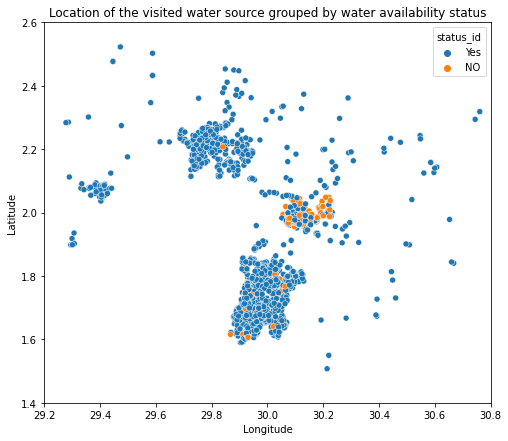

In [ ]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='lon_deg', y='lat_deg', data=rw_clean, hue="status_id")
plt.xlim(29.2,30.8)
plt.ylim(1.4,2.6)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title('Location of the visited water source grouped by water availability status');

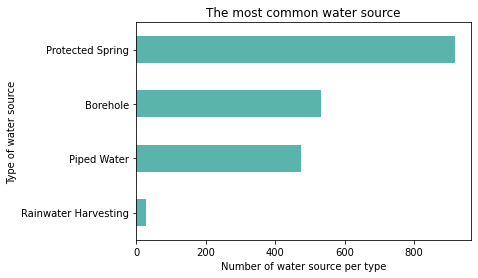

In [ ]:
#subset our dataset and create a dataframe of water sources with more than 20 observation
rw_source= rw_clean.groupby('water_source').filter(lambda x: len(x)>=20)

rw_source['water_source'].value_counts().sort_values().plot(kind = 'barh', color="#5ab4ac")
plt.title('The most common water source')
plt.xlabel('Number of water source per type')
plt.ylabel('Type of water source');

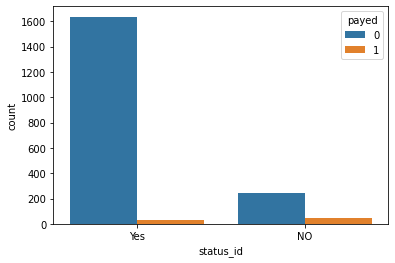

In [ ]:
#
sns.countplot(x="status_id", hue='payed', data=rw_clean)

In [ ]:
rw_payed

,lat_deg,lon_deg,install_year,report_year,oper_years,payed,water_source,status_id
0,2.228252,30.231672,2019,2019,0.0,0,1.0,Yes
1,2.101375,30.189358,2019,2020,1.0,0,4.0,Yes
2,2.198694,30.199084,2019,2020,1.0,0,3.0,Yes
3,2.205361,30.070403,2020,2020,0.0,0,4.0,Yes
4,2.432178,29.588362,2020,2020,0.0,0,1.0,Yes
...,...,...,...,...,...,...,...,...
2948,2.205103,29.781466,2020,2020,0.0,0,0.0,Yes
2949,2.257150,29.795167,2016,2020,4.0,0,0.0,Yes
2950,2.253900,29.704417,2017,2020,3.0,0,0.0,Yes
2951,2.244939,29.778825,2018,2020,2.0,0,0.0,Yes


In [ ]:
ord_enc = OrdinalEncoder()
rw_clean["water_source_code"] = ord_enc.fit_transform(rw_clean[["water_source"]].astype(str))
rw_clean[["water_source", "water_source_code"]].head(10)

,water_source,water_source_code
0,Piped Water,1.0
1,Rainwater Harvesting,4.0
2,Protected Spring,3.0
3,Rainwater Harvesting,4.0
4,Piped Water,1.0
5,Rainwater Harvesting,4.0
6,Rainwater Harvesting,4.0
7,Rainwater Harvesting,4.0
8,Rainwater Harvesting,4.0
9,Rainwater Harvesting,4.0


In [ ]:
#we can now drop the categorical data
rw_clean=rw_clean.drop('water_source', axis=1)
rw_clean=rw_clean.rename(columns={'water_source_code':'water_source'})
rw_clean=rw_clean[['lat_deg','lon_deg','install_year','report_year','oper_years','payed','water_source','status_id']]
rw_clean.head(10)


,lat_deg,lon_deg,install_year,report_year,oper_years,payed,water_source,status_id
0,2.228252,30.231672,2019,2019,0.0,0,1.0,Yes
1,2.101375,30.189358,2019,2020,1.0,0,4.0,Yes
2,2.198694,30.199084,2019,2020,1.0,0,3.0,Yes
3,2.205361,30.070403,2020,2020,0.0,0,4.0,Yes
4,2.432178,29.588362,2020,2020,0.0,0,1.0,Yes
5,2.274193,29.476524,2019,2020,1.0,0,4.0,Yes
6,2.109683,30.067292,2019,2019,0.0,0,4.0,Yes
7,2.159523,30.231497,2019,2019,0.0,0,4.0,Yes
8,2.476687,29.446412,2019,2019,0.0,0,4.0,Yes
9,2.049870,30.158613,2019,2020,1.0,0,4.0,Yes


In [ ]:
x=rw_clean[['lat_deg','lon_deg','install_year','report_year','oper_years','payed','water_source']]
y=rw_clean['status_id']

In [ ]:
#Create arrays for model development
#array=rw_clean.values
#x=array[:,0:6]
#y=array[:,7]

#create a validation set to evaluate the model
#Evaluate Algorithms: Baseline
# Test options and evaluation metric
num_folds=10
seed=7
scoring='accuracy'
val_size=0.20
seed=7
x_train, x_val, y_train,y_val=train_test_split(x,y,test_size=val_size, random_state=seed)

In [ ]:
y_val.value_counts()

Yes    339
NO      53
Name: status_id, dtype: int64

In [ ]:
# Spot-Check Algorithms
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('SVR',SVC()))

# evaluate each model in turn
results=[]
names=[]
for name, model in models:
    kfold=KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(name,'=', round(cv_results.mean(),2),'±',round(cv_results.std(),2))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR = 0.84 ± 0.02
LDA = 0.83 ± 0.02
KNN = 0.88 ± 0.02
NB = 0.86 ± 0.02
CART = 0.88 ± 0.02
SVR = 0.85 ± 0.03


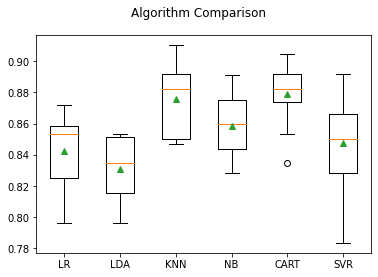

In [ ]:
# Compare Algorithms
fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,labels=names, showmeans=True)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# ensembles
scoring='accuracy'
ensembles=[]
ensembles.append(('AB',AdaBoostClassifier()))
ensembles.append(('GBM',GradientBoostingClassifier()))
ensembles.append(('RF',RandomForestClassifier()))
ensembles.append(('ET',ExtraTreesClassifier()))

results_ens=[]
names_ens=[]
for name, model in ensembles:
    kfold=KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold, scoring=scoring)
    results_ens.append(cv_results)
    names_ens.append(name)
    print(name,'=', round(cv_results.mean(),2),'±',round(cv_results.std(),2))

AB = 0.89 ± 0.02
GBM = 0.9 ± 0.02
RF = 0.89 ± 0.02
ET = 0.88 ± 0.02


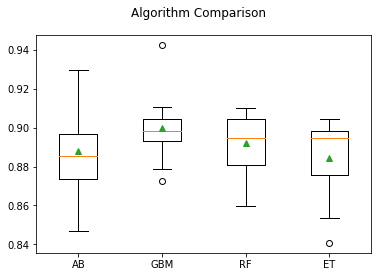

In [ ]:
# d) Compare Algorithms
fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_ens,labels=names_ens, showmeans=True)
ax.set_xticklabels(names_ens)
plt.show()

In [ ]:
#Tune the best model AGB

param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingClassifier(random_state=None)
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (round(grid_result.best_score_,2), grid_result.best_params_))

Best: 0.910000 using {'n_estimators': 150}


In [ ]:
#Tune the best model RF

param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = RandomForestClassifier(random_state=None)
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (round(grid_result.best_score_,2), grid_result.best_params_))

Best: 0.900000 using {'n_estimators': 200}


In [ ]:
#Finalize the model
final_GBM=GradientBoostingClassifier(random_state=seed, n_estimators=150)
final_GBM=final_GBM.fit(x_train, y_train)


In [ ]:
# Make predictions on validation dataset

predictions= final_GBM.predict(x_val)
print(accuracy_score(y_val, predictions))
print(confusion_matrix(y_val, predictions))
print(classification_report(y_val, predictions))

0.9056122448979592
[[ 38  15]
 [ 22 317]]
              precision    recall  f1-score   support

          NO       0.63      0.72      0.67        53
         Yes       0.95      0.94      0.94       339

    accuracy                           0.91       392
   macro avg       0.79      0.83      0.81       392
weighted avg       0.91      0.91      0.91       392



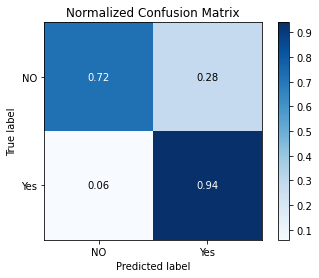

In [ ]:
skplt.metrics.plot_confusion_matrix(y_val, predictions, normalize=True)
plt.show()

Feature: 0, Score: 0.20951
Feature: 1, Score: 0.58788
Feature: 2, Score: 0.03025
Feature: 3, Score: 0.01264
Feature: 4, Score: 0.03255
Feature: 5, Score: 0.01862
Feature: 6, Score: 0.10856


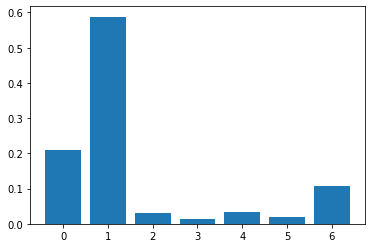

In [ ]:
#plot variables importance
# get importance from GBM
importance = final_GBM.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [ ]:
#Finalize the Random forest model
RF=RandomForestClassifier(random_state=seed, n_estimators=150)
RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [ ]:
# Make predictions on validation dataset
predictions2= RF.predict(x_val)
print(accuracy_score(y_val, predictions2))
print(confusion_matrix(y_val, predictions2))
print(classification_report(y_val, predictions2))

0.9107142857142857
[[ 41  12]
 [ 23 316]]
              precision    recall  f1-score   support

          NO       0.64      0.77      0.70        53
         Yes       0.96      0.93      0.95       339

    accuracy                           0.91       392
   macro avg       0.80      0.85      0.82       392
weighted avg       0.92      0.91      0.91       392



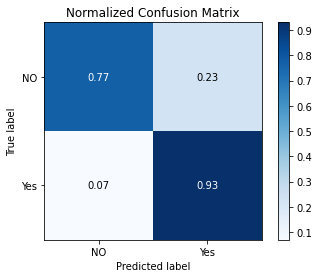

In [ ]:
skplt.metrics.plot_confusion_matrix(y_val, predictions2, normalize=True)
plt.show()

In [ ]:
variables=['lat_deg','lon_deg','install_year','report_year','oper_years','payed','water_source']

In [ ]:
RF.feature_importances_

array([0.29854965, 0.33308726, 0.09062665, 0.05819735, 0.09610106,
       0.02228275, 0.10115528])

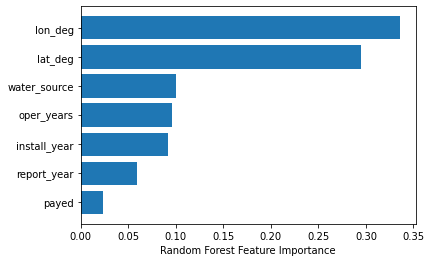

In [ ]:
feature=x_train.columns
sorted_idx = RF.feature_importances_.argsort()
plt.barh(feature[sorted_idx], RF.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance");

In [ ]:

predictions[predictions=='Yes']=1
predictions[predictions=='NO']=0


In [ ]:
y_val=y_val.replace({'Yes':1, 'NO':0})

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds=roc_curve(y_val, predictions2)
auc_score=auc(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds=roc_curve(y_val, predictions)
auc_score2=auc(fpr,tpr)

In [ ]:
auc_score

0.8528691489953806

In [ ]:
auc_score2

0.8260421884566149

In [ ]:
 x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 1873 to 2360
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lat_deg       392 non-null    float64
 1   lon_deg       392 non-null    float64
 2   install_year  392 non-null    int64  
 3   report_year   392 non-null    int64  
 4   oper_years    392 non-null    float64
 5   payed         392 non-null    int64  
 6   water_source  392 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 24.5 KB


In [ ]:
import folium
from folium import plugins

latitude=-1.9403
longitude=29.8739
# let's start again with a clean copy of the map of San Francisco
rw_map = folium.Map(location = [latitude, longitude], zoom_start = 8)#'tiles='Stamen Terrain')

# instantiate a mark cluster object for the incidents in the dataframe
points = plugins.MarkerCluster().add_to(rw_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(rw_clean.lat_deg*-1, rw_clean.lon_deg, str(rw_clean.status_id)):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(points)

# display map
rw_map

In [ ]:
#Imbalanced classification approach
# split into train/test sets with same class ratio
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.5, stratify=y)

In [ ]:
testy.value_counts()

Yes    834
NO     146
Name: status_id, dtype: int64

In [ ]:
trainy.value_counts()

Yes    834
NO     146
Name: status_id, dtype: int64

In [ ]:
# define oversample strategy
from collections import Counter
oversample = SMOTE(sampling_strategy=0.5)
# fit and apply the transform
x_over, y_over = oversample.fit_resample(x, y)
# summarize class distribution
print(Counter(y_over))
num_folds=10
seed=7
scoring='accuracy'
val_size=0.20
seed=7
x_tr_over, x_val_over, y_tr_over,y_val_over=train_test_split(x_over,y_over,test_size=val_size, random_state=seed)

Counter({'Yes': 1668, 'NO': 834})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Tune the best model AGB

param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model_over = RandomForestClassifier(random_state=None)
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model_over, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_tr_over, y_tr_over)
print("Best: %f using %s" % (round(grid_result.best_score_,2), grid_result.best_params_))

Best: 0.900000 using {'n_estimators': 150}


In [ ]:
#Finalize the model
final_rf2=RandomForestClassifier(random_state=seed, n_estimators=150)
final_rf2=final_rf2.fit(x_tr_over, y_tr_over)


In [ ]:
# Make predictions on validation dataset

predictions_over= final_rf2.predict(x_val_over)
print(accuracy_score(y_val_over, predictions_over))
print(confusion_matrix(y_val_over, predictions_over))
print(classification_report(y_val_over, predictions_over))

0.9221556886227545
[[156  22]
 [ 17 306]]
              precision    recall  f1-score   support

          NO       0.90      0.88      0.89       178
         Yes       0.93      0.95      0.94       323

    accuracy                           0.92       501
   macro avg       0.92      0.91      0.91       501
weighted avg       0.92      0.92      0.92       501



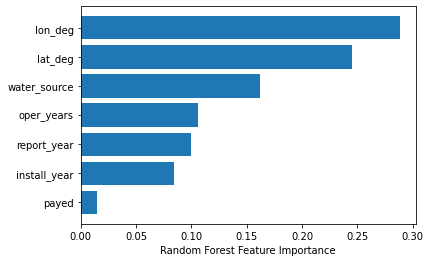

In [ ]:
feature=x_train.columns
sorted_idx = final_rf2.feature_importances_.argsort()
plt.barh(feature[sorted_idx], final_rf2.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance");